<div>
<h1>1. What you might think...</h1>
<img src="meme.jpg" width="500"/>
</div>

<div>
<h1>2. But the reality is...</h1>
<img src="venn_diagram.png" width="700"/>
</div>

<div>
<h1>3. What is Statistics?</h1>
<p style="font-size: 18px">The aggregate of scientific methods which deals with the collection, presentation, analysis and interpretation of data.</p>
</div>

<div>
<img src="stat_types.png" width="300"/>
</div>

<h1>4. Types of Data</h1> 
<div style="font-size: 18px">
<img src="data_types.png" width="500"/>
<br> 
<ul>
<li>Nominal: hair color - black, blonde, red</li>
<li>Ordinal: economic status - poor, middle class, rich</li>
<li>Discrete: number of students in a class</li>
<li>Continuous: temperature</li>
</ul>
<br>
In Data Science, we represent everything in numbers
<ul>
<li>Nominal features are always one hot encoded</li>
<li>Ordinal features are one hot encoded (sometimes maybe label encoded)</li>
<li>Discrete features may be treated as ordinal features if the number of unique values are low</li>
<li>In general, both discrete and continuous features are treated as real numbers</li>
</ul>
</div>

In [1]:
import pandas as pd
data = [["black", "rich"],
        ["black", "poor"],
        ["blone", "middle class"],
        ["red", "rich"]]

df = pd.DataFrame(data, columns=["hair_color", "economic_status"])
df

,hair_color,economic_status
0,black,rich
1,black,poor
2,blone,middle class
3,red,rich


In [2]:
df = pd.get_dummies(df, columns=["hair_color"])
df

,economic_status,hair_color_black,hair_color_blone,hair_color_red
0,rich,1,0,0
1,poor,1,0,0
2,middle class,0,1,0
3,rich,0,0,1


In [3]:
eco_status_map = {
    "poor" : 0,
    "middle class" : 1,
    "rich" : 2
} 
df['economic_status'] = df['economic_status'].apply(lambda x : eco_status_map[x])
df

,economic_status,hair_color_black,hair_color_blone,hair_color_red
0,2,1,0,0
1,0,1,0,0
2,1,0,1,0
3,2,0,0,1


<h1>5. Population vs Sample</h1>  
<img src="population_sample.png" width="500"/>

<div style="font-size: 18px">
We compute sample statistic to estimate the population parameter.
    
In Data Science, we use the sample to train our model and hope that it will work on the whole population.
</div>

<h1>6. Measures of Central Tendency</h1>

<div style="font-size: 18px">
Mean
$$
\begin{align}
\text{(sample mean) } \bar{x} &= \frac{1}{n} \sum x_i \\
\text{(population mean) } \mu &= \frac{1}{N} \sum X_i \\ 
\mu &= E(\bar{x})
\end{align}$$
</div>

In [2]:
import numpy as np
sample_arr = np.array([10.85, 5.60, 10.74, 11.47, 12.59, 7.05, 12.30, 7.13,  7.57, 11.04])
np.mean(sample_arr)

9.633999999999997

<p style="font-size: 18px">
Median
$$ \begin{align} 
\text{(sample median) } \textit{Med}(x) &= x_{\frac{n+1}{2}} \text{ if n is odd} \\
&= \frac{x_{\frac{n}{2}} + x_{\frac{n}{2} +1}}{2} \text{ if n is even}\end{align}
$$
</p>

In [5]:
np.median(sample_arr)

10.795

<p style="font-size: 18px">
Mode
$$ \text{(sample mode) } \textit{Mod}(x) = \text{most frequent value of x} \\
$$
</p>

In [19]:
sample_arr = [10, 5, 10, 11, 12, 7, 12, 7,  7, 10]
from collections import Counter
Counter(sample_arr).most_common(2)

[(10, 3), (7, 3)]

<h3>But which one to use?</h3>

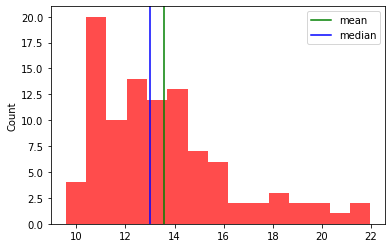

In [7]:
from scipy.stats import skewnorm
import seaborn as sns
import matplotlib.pyplot as plt

sample_arr_1 = skewnorm.rvs(loc=10, a=10, size=100, scale=5, random_state=1)
mean, median = np.mean(sample_arr_1), np.median(sample_arr_1)
sns.histplot(sample_arr_1, bins=15, color="red", linewidth=0, alpha=.7)
plt.axvline(x=mean, color="green", label='mean')
plt.axvline(x=median, color="blue", label='median')
plt.legend()

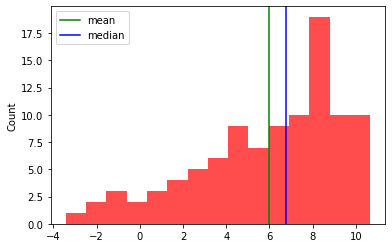

In [8]:
sample_arr_2 = skewnorm.rvs(loc=10, a=-10, size=100, scale=5, random_state=2)
mean, median = np.mean(sample_arr_2), np.median(sample_arr_2)
sns.histplot(sample_arr_2, bins=15, color="red", linewidth=0, alpha=.7)
plt.axvline(x=mean, color="green", label='mean')
plt.axvline(x=median, color="blue", label='median')
plt.legend()

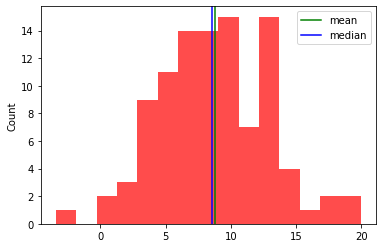

In [9]:
sample_arr_3 = skewnorm.rvs(loc=10, a=0, size=100, scale=5, random_state=3)
mean, median = np.mean(sample_arr_3), np.median(sample_arr_3)
sns.histplot(sample_arr_3, bins=15, color="red", linewidth=0, alpha=.7)
plt.axvline(x=mean, color="green", label='mean')
plt.axvline(x=median, color="blue", label='median')
plt.legend()

<div style="font-size: 18px">
<ul>
  <li>If the distribution is symmetric then either mean or median</li>
  <li>If the distribution is asymmetric then median</li>
  <li>If the data is categorical then mode</li>
</ul>
In Data Science, we select the imputation method accordingly.
</div>

<h1>7. Measures of Dispersion</h1>

<div style="font-size: 18px">
Variance and Standard Deviation
$$
\begin{align}
\text{(sample variance) } s^2 &= \frac{1}{n-1} \sum (x_i - \bar{x})^2 \\
\text{(population variance) } \sigma ^2 &= \frac{1}{N} \sum (X_i - \mu)^2 \\ 
\sigma ^2 &= E(s^2)\\ \\
\text{(sample standard deviation) } s &= \sqrt{s^2} \\
\text{(population standard deviation) } \sigma &= \sqrt{\sigma ^2} \\ 
\end{align}$$
</div>

In [10]:
sample_arr = np.array([10.85, 5.60, 10.74, 11.47, 12.59, 7.05, 12.30, 7.13,  7.57, 11.04])
np.std(sample_arr, ddof=1)

2.5248859160146004

<div style="font-size: 18px">Interquartile Range and Quartile Deviation
$$
\begin{align}
\text{(sample interquartile range) }\textit{IQR } &= Q_3 - Q_1 \\
Q_1 &= \text{median of the smallest } \frac{n}{2} \text{ values of } x \\
Q_3 &= \text{median of the largest } \frac{n}{2} \text{ values of } x \\ \\
\text{(sample quartile deviation) }\textit{QD } &= \frac{\textit{IQR}}{2} \\ 
\end{align}$$
</div>

In [15]:
q3, q1 = np.percentile(sample_arr, [75, 25])
q3 - q1

4.1225000000000005

<h1>8. Removing Outliers</h1>

<div style="font-size: 18px">
Z-score based method
$$z_i = \frac{x_i - \bar{x}}{s}$$
<img src="z.jpg" width="500"/>  
<br>
Remove values that are more than 3 standard deviations away from the mean.
</div>

In [43]:
data = [67, 68, 70, 65, 120, 71, 67, 72, 74, 64, 66]
df = pd.DataFrame(data, columns=["temperature"])
df

,temperature
0,67
1,68
2,70
3,65
4,120
5,71
6,67
7,72
8,74
9,64


In [44]:
from scipy import stats
print(stats.zscore(df["temperature"]))
mod_df = df[(np.abs(stats.zscore(df["temperature"])) < 3)]
mod_df

0    -0.402826
1    -0.336690
2    -0.204419
3    -0.535097
4     3.102360
5    -0.138283
6    -0.402826
7    -0.072148
8     0.060123
9    -0.601233
10   -0.468961
Name: temperature, dtype: float64


,temperature
0,67
1,68
2,70
3,65
5,71
6,67
7,72
8,74
9,64
10,66


<div style="font-size: 18px">
IQR based method
$$
\begin{align}
\textit{low} &= Q_1 - 1.5*\textit{IQR} \\
\textit{high} &= Q_3 + 1.5*\textit{IQR}
\end{align}
$$
<br>
Remove values that are outside $[low, high]$.
<img src="boxplot.jpg" width="300"/>
</div>

In [45]:
q3, q1 = np.percentile(df["temperature"], [75, 25])
iqr = q3 - q1
low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
mod_df = df[(df["temperature"]>=low) & (df["temperature"]<=high)]
mod_df

,temperature
0,67
1,68
2,70
3,65
5,71
6,67
7,72
8,74
9,64
10,66


<h3>But which one to use?</h3>
<!-- <div>
<!-- IQR based method is more  -->
<!-- <div> -->

<h1>9. Covariance and Correlation</h1>

<div style="font-size:18px">
    
Variance measures the spread along a single dimension.
    
    
<img src="var.png" width="600"/>
    
But what if we want to measure the spread along two dimensions?
    
<img src="covar1.png" width="600"/>

<img src="covar2.png" width="600"/>
    
    
$$
\begin{align}
cov(x,y) &= \frac{\sum (x_i - \bar{x}) (y_i - \bar{y})}{n-1} \\ \\
corr(x,y) &= \frac{cov(x,y)}{s_x s_y}
\end{align}
$$
    
In Data Science, we use correlation to find if there exists a linear relationship between a feature and the target (or two features)
</div>

Read more: https://youtu.be/TPcAnExkWwQ

In [69]:
data = [[800,  299,  2.8],
        [1480, 317, 3.7],
        [1400, 315, 3.4],
        [1000, 302, 3.3],
        [1450, 310, 3.7]]
df = pd.DataFrame(data, columns=["x1", "x2", "y"])
df

,x1,x2,y
0,800,299,2.8
1,1480,317,3.7
2,1400,315,3.4
3,1000,302,3.3
4,1450,310,3.7


<AxesSubplot:>

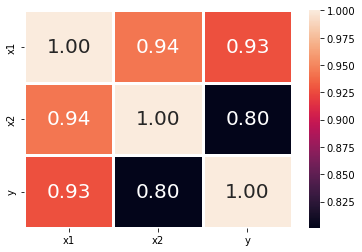

In [75]:
sns.heatmap(df.corr(), annot=True, fmt=".2f", annot_kws={"size": 20}, linewidth=3)

<h3>Be careful! Correlation is NOT causation!</h3>

<img src="corr.png" width="800"/>
Source: <a>https://www.tylervigen.com/spurious-correlations</a>


<br>
<br>
<div style="font-size:18px"> 
<ul>
  <li>Two completely random things can sometimes correlate. You'll find patterns in randomness if you look hard enough</li>
  <li>Two variables can correlate because of a third (unknown) factor</li>
  <li>A low correlation score only indicates there exists little to no linear correlation. There still might exist a non-linear relationship between the variables</li>
</ul>
</div>

<h1>10. Normal distribution: Myths and Facts</h1>

<div style="font-size: 18px">

<img src="z.jpg" width="500"/>  
<br>
$$\mathcal{N}(\mu, \sigma) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2}$$
    
<ul>
<li>Symmetric about the mean</li>
<li>Moderate values are most likely</li>
<li>Very high and very low values are (equally) rare</li>
</ul>
</div>  
 
<h3>CLT</h3>
<div style="font-size: 18px">
According to CLT, regardless of the population distribution, the sample mean approaches a normal distribution as sample size increases.
</div>
 
<br>
<img src="clt1.png" width="800"/> 
<img src="clt2.png" width="800"/> 
<img src="clt3.png" width="800"/> 
<br>
    
Read more: https://youtu.be/8Z9XRrJU9ZM

<h1>11. Is your model statistically better than others?</h1>

<div style="font-size: 18px">

<ul>
<li>It's (surprisingly) hard to show if a particular model is statistically better than other models</li>
<li>Standard statistical tests (like paired t-test) with the k-fold cross-validation metrics are misleading because the metrics are not independent</li>
</ul>  
</div>
  
<h3>So what to do?</h3>

<div style="font-size: 18px">

<ul>
<li>Accept the limitations of statistical tests and use them</li>
<li>Just use mean and std of k-fold cross-validation metrics and check if confidence intervals overlap</li>
<li>Use McNemar's test for comparing classification algorithms</li>
</ul>  
</div>  

Read more: <a>https://machinelearningmastery.com/statistical-significance-tests-for-comparing-machine-learning-algorithms/</a>


In [18]:
sujan_model_acc = np.array([87, 86, 87, 88, 86, 89, 87, 86, 88, 85])
ritu_model_acc = np.array([87.5, 86.5, 88, 88.5, 86.5, 87, 87.5, 88, 87, 85.5])
tolu_model_acc = np.array([90, 88, 89, 90, 88, 91, 89, 91, 90, 87.5])
le_model_acc = np.array([86.5, 87.5, 87, 87.5, 85.5, 86, 86.5, 87, 86, 85.5])
karan_model_acc = np.array([89, 86, 88, 85, 87, 90, 87.5, 86.5, 88.5, 85.5])

print("Sujan's model: ", np.mean(sujan_model_acc), "±", round(np.std(sujan_model_acc), 2))
print("Ritu's model: ", np.mean(ritu_model_acc), "±", round(np.std(ritu_model_acc), 2))
print("Tolu's model: ", np.mean(tolu_model_acc), "±", round(np.std(tolu_model_acc), 2))
print("Le's model: ", np.mean(le_model_acc), "±", round(np.std(le_model_acc), 2))
print("Karan's model: ", np.mean(karan_model_acc), "±", round(np.std(karan_model_acc), 2))

Sujan's model:  86.9 ± 1.14
Ritu's model:  87.2 ± 0.84
Tolu's model:  89.35 ± 1.18
Le's model:  86.5 ± 0.71
Karan's model:  87.3 ± 1.52
